<a href="https://colab.research.google.com/github/Guru-180188/Projects/blob/main/Market_Price_Prediction_up_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df= pd.read_csv("up_combine_file.csv")
df

,arrival_date,temp,humidity,precip,windspeed,state,district,market,commodity,variety,min_price,max_price,modal_price
0,03/01/2020,15.3,76.6,0.000,13.0,Uttar Pradesh,Gautam Budh Nagar,dadri,Banana - Green,Banana - Green,1350.0,1450.0,1400
1,04/01/2020,14.3,77.2,0.000,14.8,Uttar Pradesh,Gautam Budh Nagar,dadri,Banana - Green,Banana - Green,1400.0,1500.0,1450
2,05/01/2020,14.2,72.1,0.000,16.6,Uttar Pradesh,Gautam Budh Nagar,dadri,Banana - Green,Banana - Green,1400.0,1500.0,1450
3,06/01/2020,14.3,76.2,0.000,13.0,Uttar Pradesh,Gautam Budh Nagar,dadri,Banana - Green,Banana - Green,1350.0,1450.0,1400
4,07/01/2020,15.1,83.0,2.581,14.8,Uttar Pradesh,Gautam Budh Nagar,dadri,Banana - Green,Banana - Green,1350.0,1450.0,1400
...,...,...,...,...,...,...,...,...,...,...,...,...,...
27129,18/11/2022,19.3,55.2,0.000,7.6,Uttar Pradesh,Gonda,karnailganj,Banana - Green,Banana - Green,800.0,900.0,850
27130,21/11/2022,20.3,57.7,0.000,13.3,Uttar Pradesh,Gonda,karnailganj,Banana - Green,Banana - Green,700.0,800.0,750
27131,30/11/2022,20.0,57.6,0.000,7.6,Uttar Pradesh,Gonda,karnailganj,Banana - Green,Banana - Green,800.0,890.0,840
27132,06/12/2022,17.8,55.5,0.000,15.1,Uttar Pradesh,Gonda,karnailganj,Banana - Green,Banana - Green,700.0,790.0,750


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27134 entries, 0 to 27133
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   arrival_date  27134 non-null  object 
 1   temp          27134 non-null  float64
 2   humidity      27134 non-null  float64
 3   precip        27134 non-null  float64
 4   windspeed     27134 non-null  float64
 5   state         27134 non-null  object 
 6   district      27134 non-null  object 
 7   market        27134 non-null  object 
 8   commodity     27134 non-null  object 
 9   variety       27134 non-null  object 
 10  min_price     27106 non-null  float64
 11  max_price     27106 non-null  float64
 12  modal_price   27134 non-null  int64  
dtypes: float64(6), int64(1), object(6)
memory usage: 2.7+ MB


In [ ]:
df.describe()

,temp,humidity,precip,windspeed,min_price,max_price,modal_price
count,27134.000000,27134.000000,27134.000000,27134.000000,27106.000000,27106.000000,27134.000000
mean,25.160352,61.977489,3.404532,16.030699,1310.544086,1442.302664,1376.956365
std,6.931266,20.343623,11.805910,6.762024,272.239191,292.844081,280.266319
min,8.000000,7.300000,0.000000,0.300000,0.000000,0.000000,610.000000
25%,19.300000,47.600000,0.000000,11.200000,1120.000000,1250.000000,1200.000000
50%,27.200000,64.600000,0.000000,14.800000,1300.000000,1400.000000,1340.000000
75%,30.300000,79.300000,0.900000,19.400000,1500.000000,1670.000000,1600.000000
max,39.900000,99.400000,239.218000,185.400000,9020.000000,9035.000000,9025.000000


In [ ]:
data2=df.copy()

In [ ]:
df.isnull().sum()

arrival_date     0
temp             0
humidity         0
precip           0
windspeed        0
state            0
district         0
market           0
commodity        0
variety          0
min_price       28
max_price       28
modal_price      0
dtype: int64

In [ ]:
df["min_price"]=df["min_price"].fillna(df["min_price"].dropna().mean())
df["min_price"].isnull().sum()

0

In [ ]:
df["max_price"]=df["max_price"].fillna(df["max_price"].dropna().mean())
df["max_price"].isnull().sum()

0

In [ ]:
df.isnull().sum()

arrival_date    0
temp            0
humidity        0
precip          0
windspeed       0
state           0
district        0
market          0
commodity       0
variety         0
min_price       0
max_price       0
modal_price     0
dtype: int64

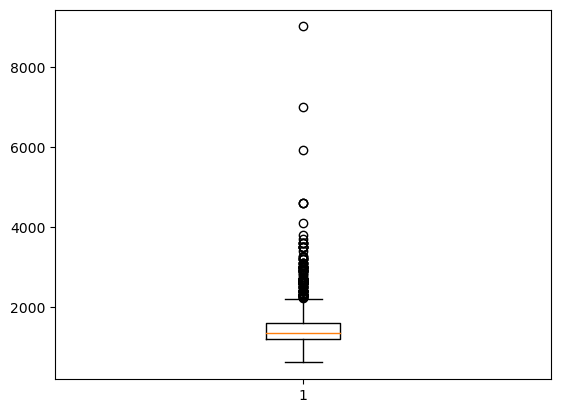

In [ ]:
plt.boxplot(df['modal_price'])
plt.show()

In [ ]:
# Calculate z-scores for the specified column
z_scores = (df['modal_price'] - df['modal_price'].mean()) / df['modal_price'].std()

# Define a threshold for identifying outliers
threshold = 3

# Find the outliers based on the threshold
outliers = df[abs(z_scores) > threshold]

# Get a list of the outlier values
outlier_values = outliers['modal_price'].tolist()

# Sort the outlier values in ascending order
sorted_outliers = sorted(outlier_values)

# Print the sorted list of outlier values
print(sorted_outliers)


[2220, 2250, 2250, 2250, 2250, 2250, 2300, 2300, 2300, 2300, 2300, 2300, 2300, 2300, 2300, 2300, 2300, 2300, 2300, 2300, 2300, 2300, 2310, 2320, 2330, 2350, 2400, 2400, 2400, 2400, 2400, 2400, 2400, 2400, 2400, 2400, 2450, 2500, 2500, 2500, 2500, 2500, 2550, 2550, 2600, 2600, 2600, 2600, 2600, 2600, 2600, 2600, 2600, 2600, 2600, 2600, 2600, 2600, 2600, 2600, 2600, 2650, 2650, 2650, 2650, 2650, 2650, 2650, 2650, 2665, 2700, 2700, 2700, 2700, 2700, 2700, 2700, 2700, 2700, 2700, 2700, 2700, 2750, 2800, 2820, 2850, 2900, 2900, 2900, 2900, 2900, 2900, 2920, 2925, 2950, 2950, 2952, 3000, 3000, 3000, 3000, 3000, 3000, 3000, 3000, 3050, 3100, 3100, 3100, 3100, 3200, 3200, 3200, 3200, 3250, 3260, 3275, 3400, 3500, 3500, 3500, 3500, 3500, 3510, 3600, 3600, 3600, 3600, 3700, 3800, 4100, 4600, 4600, 4600, 5925, 7000, 9025]


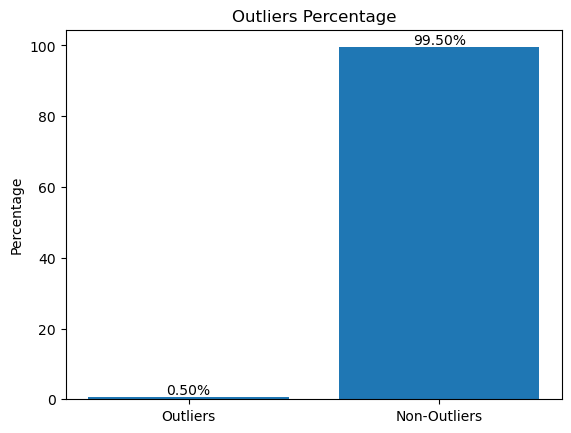

In [ ]:
# Calculate z-scores for the specified column
z_scores = (df['modal_price'] - df['modal_price'].mean()) / df['modal_price'].std()

# Define a threshold for identifying outliers
threshold = 3

# Find the outliers based on the threshold
outliers = df[abs(z_scores) > threshold]

# Calculate the percentage of outliers
outlier_percentage = (len(outliers) / len(df)) * 100

# Calculate the percentage of non-outliers
non_outlier_percentage = 100 - outlier_percentage

# Create a bar plot to visualize the outliers percentage-wise
plt.bar(['Outliers', 'Non-Outliers'], [outlier_percentage, non_outlier_percentage])

# Set the title and labels for the plot
plt.title('Outliers Percentage')
plt.ylabel('Percentage')

# Add text annotations for the outlier percentages
plt.text(0, outlier_percentage, f'{outlier_percentage:.2f}%', ha='center', va='bottom')
plt.text(1, non_outlier_percentage, f'{non_outlier_percentage:.2f}%', ha='center', va='bottom')

# Show the plot
plt.show()


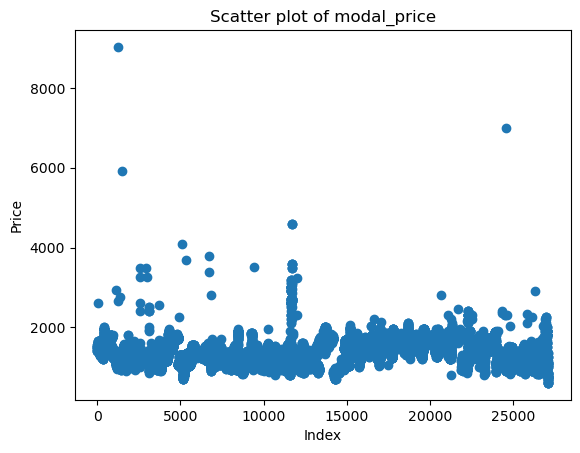

In [ ]:
# Create a scatter plot of the index against 'modal_price' column
plt.scatter(df.index, df['modal_price'])

# Set the title and labels for the plot
plt.title('Scatter plot of modal_price')
plt.xlabel('Index')
plt.ylabel('Price')

# Show the plot
plt.show()


In [ ]:
# Calculate z-scores for the specified column
z_scores = (df['modal_price'] - df['modal_price'].mean()) / df['modal_price'].std()

# Define a threshold for identifying outliers
threshold = 3

# Remove outliers based on the threshold
df_no_outliers = df[abs(z_scores) <= threshold]

# Print the updated DataFrame without outliers
print(df_no_outliers)


      arrival_date  temp  humidity  precip  windspeed          state  \
0       03/01/2020  15.3      76.6   0.000       13.0  Uttar Pradesh   
1       04/01/2020  14.3      77.2   0.000       14.8  Uttar Pradesh   
2       05/01/2020  14.2      72.1   0.000       16.6  Uttar Pradesh   
3       06/01/2020  14.3      76.2   0.000       13.0  Uttar Pradesh   
4       07/01/2020  15.1      83.0   2.581       14.8  Uttar Pradesh   
...            ...   ...       ...     ...        ...            ...   
27129   18/11/2022  19.3      55.2   0.000        7.6  Uttar Pradesh   
27130   21/11/2022  20.3      57.7   0.000       13.3  Uttar Pradesh   
27131   30/11/2022  20.0      57.6   0.000        7.6  Uttar Pradesh   
27132   06/12/2022  17.8      55.5   0.000       15.1  Uttar Pradesh   
27133   07/12/2022  17.5      53.2   0.000       13.0  Uttar Pradesh   

                district       market       commodity         variety  \
0      Gautam Budh Nagar        dadri  Banana - Green  Banana 

In [ ]:
df_no_outliers.head()

,arrival_date,temp,humidity,precip,windspeed,state,district,market,commodity,variety,min_price,max_price,modal_price
0,03/01/2020,15.3,76.6,0.000,13.0,Uttar Pradesh,Gautam Budh Nagar,dadri,Banana - Green,Banana - Green,1350.0,1450.0,1400
1,04/01/2020,14.3,77.2,0.000,14.8,Uttar Pradesh,Gautam Budh Nagar,dadri,Banana - Green,Banana - Green,1400.0,1500.0,1450
2,05/01/2020,14.2,72.1,0.000,16.6,Uttar Pradesh,Gautam Budh Nagar,dadri,Banana - Green,Banana - Green,1400.0,1500.0,1450
3,06/01/2020,14.3,76.2,0.000,13.0,Uttar Pradesh,Gautam Budh Nagar,dadri,Banana - Green,Banana - Green,1350.0,1450.0,1400
4,07/01/2020,15.1,83.0,2.581,14.8,Uttar Pradesh,Gautam Budh Nagar,dadri,Banana - Green,Banana - Green,1350.0,1450.0,1400


In [ ]:
len(df_no_outliers)

26997

In [ ]:
# Find the indices of rows with outliers in the 'modal_price' column
outlier_indices = df[np.abs(df['modal_price'] - df['modal_price'].mean()) > 3 * df['modal_price'].std()].index

# Remove the outlier rows from all columns
df = df.drop(outlier_indices)

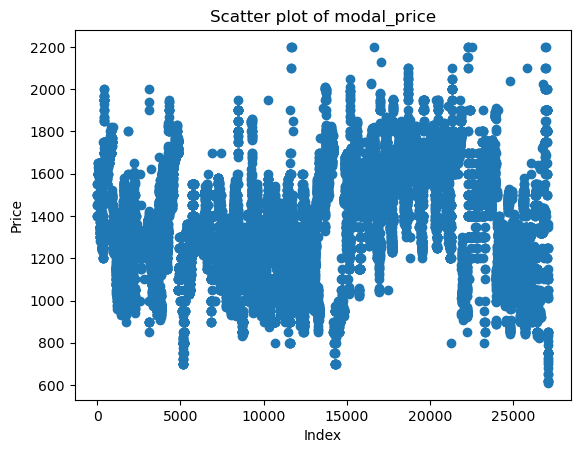

In [ ]:
plt.scatter(df_no_outliers.index, df_no_outliers['modal_price'])

# Set the title and labels for the plot
plt.title('Scatter plot of modal_price')
plt.xlabel('Index')
plt.ylabel('Price')

# Show the plot
plt.show()


In [ ]:
df['arrival_date'] = pd.to_datetime(df['arrival_date'], dayfirst=True)
df['year'] = pd.to_datetime(df['arrival_date']).dt.year
df['month'] = pd.to_datetime(df['arrival_date']).dt.month
df['day'] = pd.to_datetime(df['arrival_date']).dt.day
df['weekday'] = pd.to_datetime(df['arrival_date']).dt.weekday
df['week_of_year'] = pd.to_datetime(df['arrival_date']).dt.isocalendar().week

In [ ]:
df.head()

,arrival_date,temp,humidity,precip,windspeed,state,district,market,commodity,variety,min_price,max_price,modal_price,year,month,day,weekday,week_of_year
0,2020-01-03,15.3,76.6,0.000,13.0,Uttar Pradesh,Gautam Budh Nagar,dadri,Banana - Green,Banana - Green,1350.0,1450.0,1400,2020,1,3,4,1
1,2020-01-04,14.3,77.2,0.000,14.8,Uttar Pradesh,Gautam Budh Nagar,dadri,Banana - Green,Banana - Green,1400.0,1500.0,1450,2020,1,4,5,1
2,2020-01-05,14.2,72.1,0.000,16.6,Uttar Pradesh,Gautam Budh Nagar,dadri,Banana - Green,Banana - Green,1400.0,1500.0,1450,2020,1,5,6,1
3,2020-01-06,14.3,76.2,0.000,13.0,Uttar Pradesh,Gautam Budh Nagar,dadri,Banana - Green,Banana - Green,1350.0,1450.0,1400,2020,1,6,0,2
4,2020-01-07,15.1,83.0,2.581,14.8,Uttar Pradesh,Gautam Budh Nagar,dadri,Banana - Green,Banana - Green,1350.0,1450.0,1400,2020,1,7,1,2


In [ ]:
df.shape

(26997, 18)

In [ ]:
df1=df.copy()

In [ ]:
#as commomdity has only single value so we will drop it , and as we will forescast new prices so year also has no use.
df1=df1.drop(['year','commodity'],axis=1)

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
# Convert categorical variables to numerical using LabelEncoder
label_encoder = LabelEncoder()
df1['state'] = label_encoder.fit_transform(df1['state'])
df1['district'] = label_encoder.fit_transform(df1['district'])
df1['market'] = label_encoder.fit_transform(df1['market'])
df1['variety'] = label_encoder.fit_transform(df1['variety'])

# Drop the original datetime column
df1.drop('arrival_date', axis=1, inplace=True)

In [ ]:
df1.head()

,temp,humidity,precip,windspeed,state,district,market,variety,min_price,max_price,modal_price,month,day,weekday,week_of_year
0,15.3,76.6,0.000,13.0,0,8,9,0,1350.0,1450.0,1400,1,3,4,1
1,14.3,77.2,0.000,14.8,0,8,9,0,1400.0,1500.0,1450,1,4,5,1
2,14.2,72.1,0.000,16.6,0,8,9,0,1400.0,1500.0,1450,1,5,6,1
3,14.3,76.2,0.000,13.0,0,8,9,0,1350.0,1450.0,1400,1,6,0,2
4,15.1,83.0,2.581,14.8,0,8,9,0,1350.0,1450.0,1400,1,7,1,2


In [ ]:
df1['seasons'] = df1['month'].map({
    1: 'winter',
    2: 'winter',
    3: 'spring',
    4: 'spring',
    5: 'spring',
    6: 'summer',
    7: 'summer',
    8: 'summer',
    9: 'autumn',
    10: 'autumn',
    11: 'autumn',
    12: 'winter'
})
df1.head(5)

,temp,humidity,precip,windspeed,state,district,market,variety,min_price,max_price,modal_price,month,day,weekday,week_of_year,seasons
0,15.3,76.6,0.000,13.0,0,8,9,0,1350.0,1450.0,1400,1,3,4,1,winter
1,14.3,77.2,0.000,14.8,0,8,9,0,1400.0,1500.0,1450,1,4,5,1,winter
2,14.2,72.1,0.000,16.6,0,8,9,0,1400.0,1500.0,1450,1,5,6,1,winter
3,14.3,76.2,0.000,13.0,0,8,9,0,1350.0,1450.0,1400,1,6,0,2,winter
4,15.1,83.0,2.581,14.8,0,8,9,0,1350.0,1450.0,1400,1,7,1,2,winter


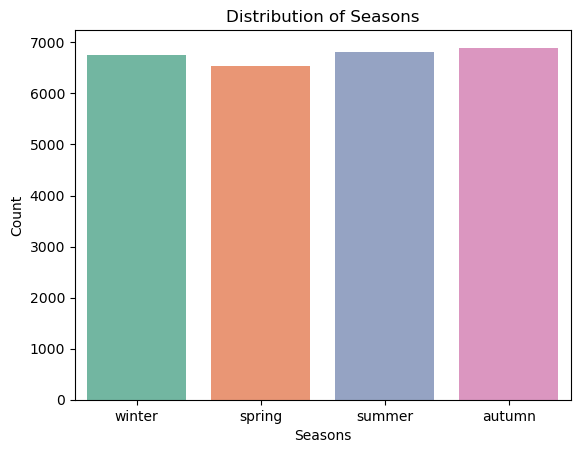

In [ ]:
sns.countplot(data=df1, x='seasons', palette='Set2')

# Add labels and title
plt.xlabel('Seasons')
plt.ylabel('Count')
plt.title('Distribution of Seasons')

# Display the plot
plt.show()

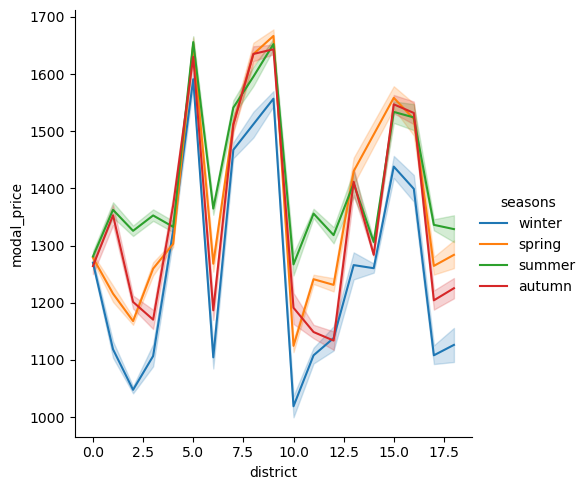

In [ ]:
import plotly.express as px
sns.relplot(data=df1,x='district',y='modal_price',hue='seasons',kind='line')

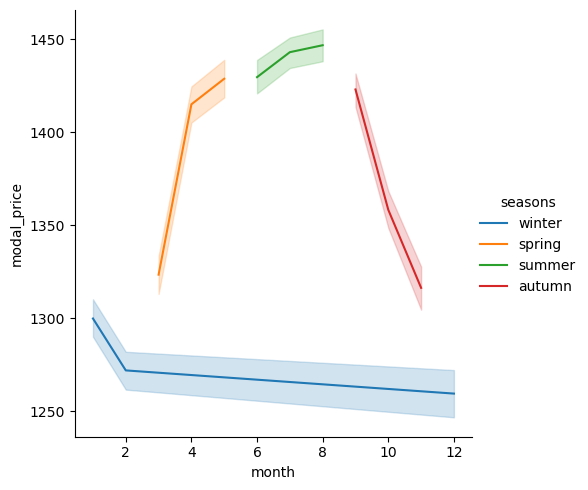

In [ ]:
import plotly.express as px
sns.relplot(data=df1,x='month',y='modal_price',hue='seasons',kind='line')

In [ ]:
df1['seasons'] = label_encoder.fit_transform(df1['seasons'])

<Axes: >

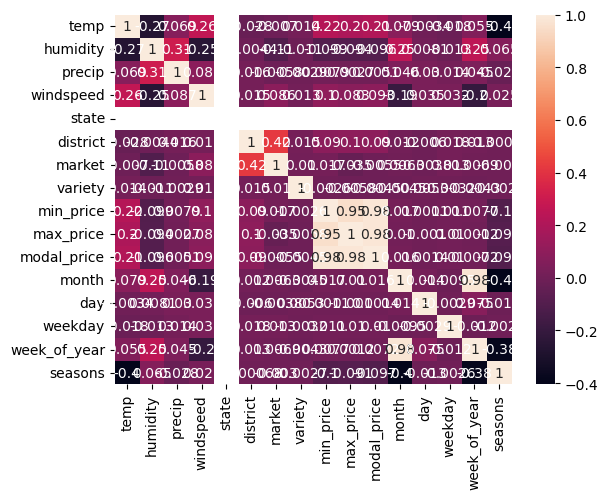

In [ ]:
sns.heatmap(df1.corr(),annot=True)

In [ ]:
df1=df1.drop(['min_price','max_price'],axis=1)

In [ ]:
df1['week_of_year'] = df1['week_of_year'].astype('int32')

In [ ]:
df1

,temp,humidity,precip,windspeed,state,district,market,variety,modal_price,month,day,weekday,week_of_year,seasons
0,15.3,76.6,0.000,13.0,0,8,9,0,1400,1,3,4,1,3
1,14.3,77.2,0.000,14.8,0,8,9,0,1450,1,4,5,1,3
2,14.2,72.1,0.000,16.6,0,8,9,0,1450,1,5,6,1,3
3,14.3,76.2,0.000,13.0,0,8,9,0,1400,1,6,0,2,3
4,15.1,83.0,2.581,14.8,0,8,9,0,1400,1,7,1,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27129,19.3,55.2,0.000,7.6,0,10,20,0,850,11,18,4,46,0
27130,20.3,57.7,0.000,13.3,0,10,20,0,750,11,21,0,47,0
27131,20.0,57.6,0.000,7.6,0,10,20,0,840,11,30,2,48,0
27132,17.8,55.5,0.000,15.1,0,10,20,0,750,12,6,1,49,3


In [ ]:
list2= (df1.iloc[:1].values)
list3=tuple(list2)

In [ ]:
# Separate features (X) and target variable (y)
X = df1.drop(['modal_price'], axis=1)
y = df1[['modal_price']]

In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=77)

In [ ]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((21597, 13), (21597, 1), (5400, 13), (5400, 1))

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor ,GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor
from sklearn.multioutput import MultiOutputRegressor
from flaml import AutoML

# RandomForestRegressor

In [ ]:
#base_regressor = RandomForestRegressor()
rfr=RandomForestRegressor()
# Create the Multi-Output Regressor with the base regressor
#model= MultiOutputRegressor(base_regressor)

# Train the Multi-Output Regressor on the training data
rfr.fit(X_train, y_train)

C:\Users\GURUDARPAN\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor()

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, explained_variance_score

# Predict on the testing data

y_test_pred = rfr.predict(X_test)
r2_test = r2_score(y_test, y_test_pred)
mse = mean_squared_error(y_test, y_test_pred)
rmse = np.sqrt(mse)
print("Testing R-squared: {:}".format(r2_test))
print("Testing mse: {:}".format(mse))
print("Testing rmse: {:}".format(rmse))

Testing R-squared: 0.8578299517795596
Testing mse: 8942.80080937037
Testing rmse: 94.5663830828396


In [ ]:
# Predict on the training data

y_train_pred = rfr.predict(X_train)
r2_train = r2_score(y_train, y_train_pred)
mse = mean_squared_error(y_train, y_train_pred)
rmse = np.sqrt(mse)
print("Training R-squared: {:}".format(r2_train))
print("Training mse: {:}".format(mse))
print("Training rmse: {:}".format(rmse))


Training R-squared: 0.980322025714853
Training mse: 1258.2265142890217
Training rmse: 35.47148875208118


# XG Boost Regressor

In [ ]:
xgb=XGBRegressor()
xgb.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [ ]:
# Predict on the testing data

y_test_pred = xgb.predict(X_test)
r2_test = r2_score(y_test, y_test_pred)
mse = mean_squared_error(y_test, y_test_pred)
rmse = np.sqrt(mse)
print("Testing R-squared: {:}".format(r2_test))
print("Testing mse: {:}".format(mse))
print("Testing rmse: {:}".format(rmse))

Testing R-squared: 0.8455917444671226
Testing mse: 9712.610284916213
Testing rmse: 98.55257624697698


In [ ]:
# Predict on the training data

y_train_pred = xgb.predict(X_train)
r2_train = r2_score(y_train, y_train_pred)
mse = mean_squared_error(y_train, y_train_pred)
rmse = np.sqrt(mse)
print("Training R-squared: {:}".format(r2_train))
print("Training mse: {:}".format(mse))
print("Training rmse: {:}".format(rmse))

Training R-squared: 0.9074681175911977
Training mse: 5916.567741005122
Training rmse: 76.91922868181351


In [ ]:
y_train = y_train.to_numpy()

# AutoML

In [ ]:
automl=AutoML(task="regression", time_budget=60)
automl.fit(X_train, y_train)

[flaml.automl.logger: 08-20 10:53:12] {1679} INFO - task = regression
[flaml.automl.logger: 08-20 10:53:12] {1690} INFO - Evaluation method: holdout
[flaml.automl.logger: 08-20 10:53:12] {1788} INFO - Minimizing error metric: 1-r2
[flaml.automl.logger: 08-20 10:53:12] {1900} INFO - List of ML learners in AutoML Run: ['lgbm', 'rf', 'xgboost', 'extra_tree', 'xgb_limitdepth']
[flaml.automl.logger: 08-20 10:53:12] {2218} INFO - iteration 0, current learner lgbm


TypeError: 'NoneType' object is not callable

In [ ]:
# Predict on the testing data

y_test_pred = automl.predict(X_test)
r2_test = r2_score(y_test, y_test_pred)
mse = mean_squared_error(y_test, y_test_pred)
rmse = np.sqrt(mse)
print("Testing R-squared: {:}".format(r2_test))
print("Testing mse: {:}".format(mse))
print("Testing rmse: {:}".format(rmse))

Testing R-squared: 0.886399243235285
Testing mse: 7145.7311315346315
Testing rmse: 84.53242650920788


In [ ]:
# Predict on the training data

y_train_pred = automl.predict(X_train)
r2_train = r2_score(y_train, y_train_pred)
mse = mean_squared_error(y_train, y_train_pred)
rmse = np.sqrt(mse)
print("Training R-squared: {:}".format(r2_train))
print("Training mse: {:}".format(mse))
print("Training rmse: {:}".format(rmse))

Training R-squared: 0.9992638138814636
Training mse: 47.07237037570452
Training rmse: 6.860930722263891


In [ ]:
# Model 1 results
r2_train_model1 = 0.9789525141560602
mse_train_model1 = 1345.7942552530444
rmse_train_model1= 36.685068560015594

r2_test_model1 =0.845722252365489
mse_test_model1 = 9704.401058333335
rmse_test_model1 =98.51091847269183

# Model 2 results
r2_train_model2 = 0.900866073217013
mse_train_model2 = 6338.708107678031
rmse_train_model2 = 79.61600409263222

r2_test_model2 =0.8288146008920068
mse_test_model2 = 10767.928581705659
rmse_test_model2 = 103.76863004639533

# Model 3 results
r2_train_model3 =0.9991447978430824
mse_train_model3 =  54.68235771215089
rmse_train_model3 = 7.394752038584586

r2_test_model3 =  0.8721794083754111
mse_test_model3 = 8040.189227918045
rmse_test_model3 =89.667102261186320


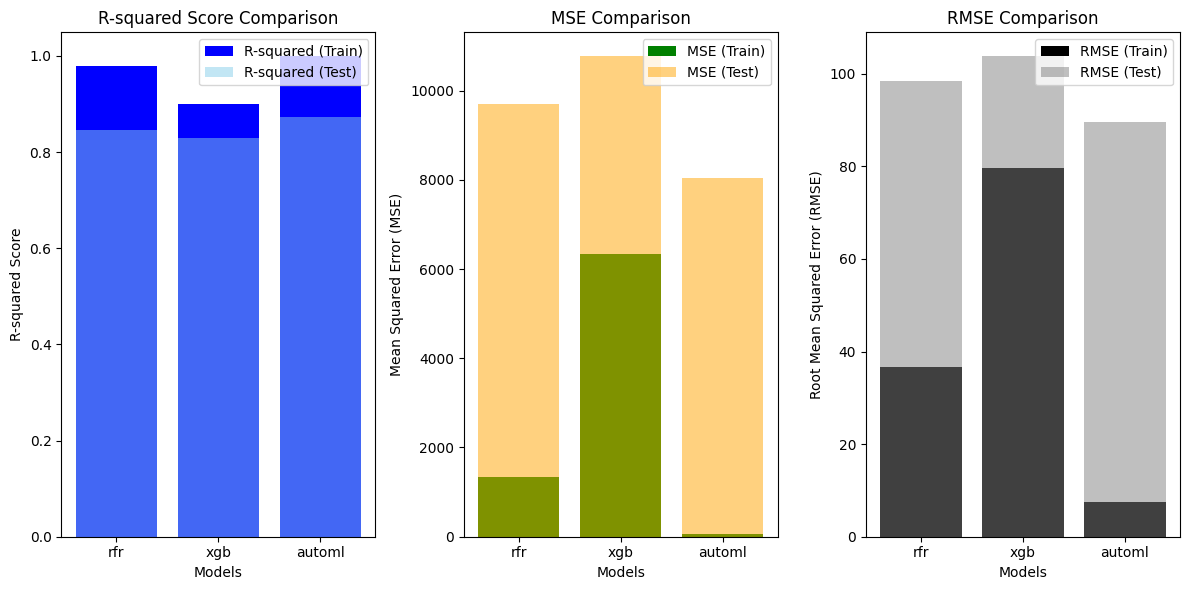

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Data for the plot
models = ['rfr', 'xgb', 'automl']
r2_train = [r2_train_model1, r2_train_model2, r2_train_model3]
r2_test = [r2_test_model1, r2_test_model2, r2_test_model3]
mse_train = [mse_train_model1, mse_train_model2, mse_train_model3]
mse_test = [mse_test_model1, mse_test_model2, mse_test_model3]
rmse_train = [rmse_train_model1, rmse_train_model2, rmse_train_model3]
rmse_test = [rmse_test_model1, rmse_test_model2, rmse_test_model3]

# Create the overlay comparison plot
plt.figure(figsize=(12, 6))

# R-squared comparison plot
plt.subplot(131)
plt.bar(models, r2_train, color='b', label='R-squared (Train)')
plt.bar(models, r2_test, color='skyblue', label='R-squared (Test)', alpha=0.5)
plt.xlabel('Models')
plt.ylabel('R-squared Score')
plt.title('R-squared Score Comparison')
plt.legend()

# MSE comparison plot
plt.subplot(132)
plt.bar(models, mse_train, color='g', label='MSE (Train)')
plt.bar(models, mse_test, color='orange', label='MSE (Test)', alpha=0.5)
plt.xlabel('Models')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('MSE Comparison')
plt.legend()

# RMSE comparison plot
plt.subplot(133)
plt.bar(models, rmse_train, color='black', label='RMSE (Train)')
plt.bar(models, rmse_test, color='gray', label='RMSE (Test)', alpha=0.5)
plt.xlabel('Models')
plt.ylabel('Root Mean Squared Error (RMSE)')
plt.title('RMSE Comparison')
plt.legend()

plt.tight_layout()
plt.show()
